# Title: The American Money Map: A Journey Through Financial Literacy


**Team:** A08  
**Team Members:**  
- Jesse Kinsmann (Project Manager)  
- Anna Wei  
- Chamnan Suon  
- Hemanth Kumar  
- Tanish Puneeth  
- Yue Yin  

**Data Source:**  
[FINRA Foundation – National Financial Capability Study (NFCS)](https://finrafoundation.org/nfcs-data-and-downloads)  


### Problem Definition

Financial literacy plays a critical role in shaping both personal and economic well-being.  
- **Higher levels** of financial literacy enable individuals to make better decisions and achieve greater life satisfaction.  
- **Lower levels** can lead to poor choices that negatively impact many aspects of life.

Building on this understanding, this project evaluates the **accuracy of self-assessed financial confidence and financial knowledge** by comparing them with individuals’ actual financial literacy scores across the U.S. population.  

The study further examines how this alignment—or potential discrepancy—varies by key demographic factors, including **age, gender, region, and annual income**.

### Executive Summary
This report analyzes US resident self reported survey responses to understand what variables impact one's financial literacy

#### Objectives

We will:

1. **Define financial literacy**  
   - Identify the key components and factors that make up one’s financial literacy score.  

2. **Analyze trends**  
   - Explore reported financial confidence and financial knowledge in relation to age, gender, region, and annual income.  

3. **Evaluate findings**  
   - Compare initial data analysis and visualizations with actual financial literacy scores.  
   - Assess the validity of individuals’ self-assessments.  


### Cleaning

Our project's dataset was originally a series of 130 varying codes in a CSV file, with the code definitions provided in a separate PDF document. For example, there was a ‘States’ column where the states were represented as numbers rather than the actual state name. To address this problem, the team created a dictionary of these codes corresponding to the column name. We then created a dictionary of those dictionaries to enable iteration via a for loop. After running the for loop, we produced a cleaned CSV file with blank values replaced by ‘No response given’  and codes mapped to their corresponding definitions. 


### Imports used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D 

In [12]:
#How does financial literacy vary across age groups and genders in the 2024 NFCS data?
#How does financial literacy vary across regions and divisions in the 2024 NFCS data?


cleaned_df = pd.read_csv("2024 Cleaned.csv", na_values=["", " ", "NA", "N/A", "null", ".", "na"])
original_df = pd.read_csv("NFCS 2024 State Data 250623.csv", na_values=["", " ", "NA", "N/A", "null", ".", "na"])
cleaned_df_2024 = pd.read_csv("NFCS 2024 State Data 250623.csv", na_values=["", " ", "NA", "N/A", "null", ".", "na"])


# STATEQ (2) State
stateq = {
    1: "Alabama", 2: "Alaska", 3: "Arizona", 4: "Arkansas", 5: "California",
    6: "Colorado", 7: "Connecticut", 8: "Delaware", 9: "District of Columbia",
    10: "Florida", 11: "Georgia", 12: "Hawaii", 13: "Idaho", 14: "Illinois",
    15: "Indiana", 16: "Iowa", 17: "Kansas", 18: "Kentucky", 19: "Louisiana",
    20: "Maine", 21: "Maryland", 22: "Massachusetts", 23: "Michigan",
    24: "Minnesota", 25: "Mississippi", 26: "Missouri", 27: "Montana",
    28: "Nebraska", 29: "Nevada", 30: "New Hampshire", 31: "New Jersey",
    32: "New Mexico", 33: "New York", 34: "North Carolina", 35: "North Dakota",
    36: "Ohio", 37: "Oklahoma", 38: "Oregon", 39: "Pennsylvania", 40: "Rhode Island",
    41: "South Carolina", 42: "South Dakota", 43: "Tennessee", 44: "Texas",
    45: "Utah", 46: "Vermont", 47: "Virginia", 48: "Washington", 49: "West Virginia",
    50: "Wisconsin", 51: "Wyoming"
}

# CENSUSDIV (3) Census Division
census_div = {
    1: "New England",
    2: "Middle Atlantic",
    3: "East North Central",
    4: "West North Central",
    5: "South Atlantic",
    6: "East South Central",
    7: "West South Central",
    8: "Mountain",
    9: "Pacific"
}

# CENSUSREG (4) Census Region
census_reg = {
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West"
}

# A50A (5) Gender (nonbinary randomly assigned)
gender = {
    1: "Male",
    2: "Female"
}

# A3Ar_w (6) Age group
age_group = {
    1: "18-24",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65+"
}

# A50B (7) Gender/Age net (nonbinary randomly assigned)
gender_age = {
    1: "Male 18-24",
    2: "Male 25-34",
    3: "Male 35-44",
    4: "Male 45-54",
    5: "Male 55-64",
    6: "Male 65+",
    7: "Female 18-24",
    8: "Female 25-34",
    9: "Female 35-44",
    10: "Female 45-54",
    11: "Female 55-64",
    12: "Female 65+"
}

# A4A_new_w (8) Ethnicity
ethnicity = {
    1: "White non-Hispanic",
    2: "Non-White"
}

# A5_2015 (9) Highest education completed
education_2015 = {
    1: "Did not complete high school",
    2: "High school graduate - regular high school diploma",
    3: "High school graduate - GED or alternative credential",
    4: "Some college, no degree",
    5: "Associate's degree",
    6: "Bachelor's degree",
    7: "Post graduate degree",
    99: "Prefer not to say"
}

# A6 (10) Marital status
marital_status = {
    1: "Married",
    2: "Single",
    3: "Separated",
    4: "Divorced",
    5: "Widowed/widower",
    99: "Prefer not to say"
}

# A7 (11) Current living arrangements
living_arrangements = {
    1: "I am the only adult in the household",
    2: "I live with my spouse/partner/significant other",
    3: "I live in my parents' home",
    4: "I live with other family, friends, or roommates",
    99: "Prefer not to say"
}

# A7A (12) Marital status variable
marital_status_var = {
    1: "Married",
    2: "Living with partner",
    3: "Single"
}

# A11 (13) Number of financially dependent children
num_children = {
    1: "1",
    2: "2",
    3: "3",
    4: "4 or more",
    5: "No financially dependent children",
    6: "Do not have any children",
    99: "Prefer not to say"
}

# A8_2021 (14) Household approximate annual income
annual_income = {
    1: "Less than $15,000",
    2: "At least $15,000 but less than $25,000",
    3: "At least $25,000 but less than $35,000",
    4: "At least $35,000 but less than $50,000",
    5: "At least $50,000 but less than $75,000",
    6: "At least $75,000 but less than $100,000",
    7: "At least $100,000 but less than $150,000",
    8: "At least $150,000 but less than $200,000",
    9: "At least $200,000 but less than $300,000",
    10: "$300,000 or more",
    98: "Don't know",
    99: "Prefer not to say"
}

# AM21 (15) Have you ever been a member of the U.S. Armed Services
armed_services = {
    1: "Currently a member of the U.S. Armed Services",
    2: "Previously a member of the U.S. Armed Services",
    3: "Never a member of the U.S. Armed Services",
    99: "Prefer not to say"
}

# X3 (16) Questionnaire version
questionnaire_version = {
    1: "Core questions",
    2: "Military"
}

# A9 (17) Current employment or work status
employment_status = {
    1: "Self-employed",
    2: "Work full-time for an employer [or the military]",
    3: "Work part-time for an employer [or the military]",
    4: "Homemaker",
    5: "Full-time student",
    6: "Permanently sick, disabled, or unable to work",
    7: "Unemployed or temporarily laid off",
    8: "Retired",
    99: "Prefer not to say"
}

# A40 (18) Additional work for pay in past 12 months
additional_work = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# A10 (19) Spouse/partner employment status
spouse_employment = {
    1: "Self-employed",
    2: "Work full-time for an employer",
    3: "Work part-time for an employer",
    4: "Homemaker",
    5: "Full-time student",
    6: "Permanently sick, disabled, or unable to work",
    7: "Unemployed or temporarily laid off",
    8: "Retired",
    99: "Prefer not to say"
}

# A10A (20) Household retirement status
household_retirement = {
    1: "Non-retired household",
    2: "Retired household--Respondent retired",
    3: "Retired household--Respondent not working and spouse retired"
}

# A21_2015 (21) Part-time student
part_time_student = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# A14 (22) Knowledgeable about saving/investing/debt
household_finance_knowledge = {
    1: "You",
    2: "Someone else",
    3: "You and someone else are equally knowledgeable",
    98: "Don't know",
    99: "Prefer not to say"
}

# A41 (23) Highest education completed
education_level = {
    1: "Did not complete high school",
    2: "High school graduate/GED",
    3: "Some college, no degree",
    4: "Associate's degree",
    5: "Bachelor's degree",
    6: "Post graduate degree",
    98: "Don't know",
    99: "Prefer not to say"
}

# A61 (24) Parents or older relatives financially dependent
financial_dependents = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J1 (25) Satisfaction with financial condition
financial_satisfaction = {
    1: "1 - Not At All Satisfied",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10 - Extremely Satisfied",
    98: "Don't know",
    99: "Prefer not to say"
}

# J2 (26) Willingness to take financial risks
financial_risk_willingness = {
    1: "1 - Not At All Willing",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10 - Very Willing",
    98: "Don't know",
    99: "Prefer not to say"
}

# J3 (27) Spending vs income
spending_vs_income = {
    1: "Spending less than income",
    2: "Spending more than income",
    3: "Spending about equal to income",
    98: "Don't know",
    99: "Prefer not to say"
}

# J4 (28) Difficulty covering expenses
expense_difficulty = {
    1: "Very difficult",
    2: "Somewhat difficult",
    3: "Not at all difficult",
    98: "Don't know",
    99: "Prefer not to say"
}

# J40 (29) Household income description
income_variability = {
    1: "Roughly the same amount each month",
    2: "Occasionally varies from month to month",
    3: "Varies quite often from month to month",
    98: "Don't know",
    99: "Prefer not to say"
}

# J5 (30) Emergency or rainy day funds
emergency_funds = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J6 (31) Saving for children's college education
college_savings = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J8 (32) Tried to figure out how much to save for retirement
retirement_planning = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J9 (33) Tried to figure out retirement savings before spouse retired
pre_retirement_planning = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J10 (34) Experienced a large unexpected drop in income in past 12 months
income_drop = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J20 (35) Confidence in coming up with $2,000 in an unexpected need
confidence_2000 = {
    1: "I am certain I could come up with the full $2,000",
    2: "I could probably come up with $2,000",
    3: "I could probably not come up with $2,000",
    4: "I am certain I could not come up with $2,000",
    98: "Don't know",
    99: "Prefer not to say"
}

# J60_1 (36) Source of $2,000 - money already saved
source_saved_money = {
    0: "NOT SELECTED: Take it from money I have saved",
    1: "Take it from money I have saved"
}

# J60_2 (37) Source of $2,000 - credit card
source_credit_card = {
    0: "NOT SELECTED: Put it on a credit card",
    1: "Put it on a credit card"
}

# J60_3 (38) Source of $2,000 - borrow from family/friends
source_borrow = {
    0: "NOT SELECTED: Borrow from family/friends",
    1: "Borrow from family/friends"
}

# J60_4 (39) Source of $2,000 - take out a loan
source_loan = {
    0: "NOT SELECTED: Take out a loan",
    1: "Take out a loan"
}

# J60_5 (40) Source of $2,000 - withdraw from retirement account
source_retirement = {
    0: "NOT SELECTED: Withdraw from a retirement account",
    1: "Withdraw from a retirement account"
}

# J60_6 (41) Source of $2,000 - work more to get more income
source_work_more = {
    0: "NOT SELECTED: Work more to get more income",
    1: "Work more to get more income"
}

# J60_7 (42) Source of $2,000 - sell something owned
source_sell_assets = {
    0: "NOT SELECTED: Sell something I own (e.g., jewelry, car, etc.)",
    1: "Sell something I own (e.g., jewelry, car, etc.)"
}

# J60_90 (43) Source of $2,000 - other
source_other = {
    0: "NOT SELECTED: Other",
    1: "Other"
}

# J60_98 (44) Source of $2,000 - don't know
source_dont_know = {
    0: "NOT SELECTED: Don't know",
    1: "Don't know"
}

# J60_99 (45) Source of $2,000 - prefer not to say
source_prefer_no = {
    0: "NOT SELECTED: Prefer not to say",
    1: "Prefer not to say"
}

# J61 (46) Increased food costs caused cutting back on other spending
food_costs_cutbacks = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J62 (47) Experienced severe weather events affecting finances
severe_weather_finances = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J32 (48) Rating of current credit record
credit_record_rating = {
    1: "Very bad",
    2: "Bad",
    3: "About average",
    4: "Good",
    5: "Very good",
    98: "Don't know",
    99: "Prefer not to say"
}

# J33_40 (49) Thinking about personal finances can make me feel anxious
finance_anxiety = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# J63 (50) Time spent thinking about personal finances
time_finances_total = {
    1: "0 hours per week",
    2: "1 hour",
    3: "2 hours",
    4: "3 to 4 hours",
    5: "5 to 9 hours",
    6: "10 to 19 hours",
    7: "20+ hours per week",
    98: "Don't know",
    99: "Prefer not to say"
}

# J64 (51) Hours spent at work thinking about finances
time_finances_work = {
    1: "0 hours per week",
    2: "1 hour",
    3: "2 hours",
    4: "3 to 4 hours",
    5: "5 to 9 hours",
    6: "10 to 19 hours",
    7: "20+ hours per week",
    98: "Don't know",
    99: "Prefer not to say"
}

# J41_1 (52) Feeling like never having the things I want
money_never_have = {
    1: "Does not describe me at all",
    2: "Describes me very little",
    3: "Describes me somewhat",
    4: "Describes me very well",
    5: "Describes me completely",
    98: "Don't know",
    99: "Prefer not to say"
}

# J41_2 (53) Just getting by financially
money_just_getting_by = money_never_have.copy()  # same scale

# J41_3 (54) Concern money won't last
money_wont_last = money_never_have.copy()  # same scale

# J42_1 (55) Money left over at end of month
money_leftover = {
    1: "Never",
    2: "Rarely",
    3: "Sometimes",
    4: "Often",
    5: "Always",
    98: "Don't know",
    99: "Prefer not to say"
}

# J42_2 (56) Finances control my life
finances_control_life = money_leftover.copy()  # same scale

# J43 (57) Confidence in achieving financial goal
financial_goal_confidence = {
    1: "Not at all confident",
    2: "Not very confident",
    3: "Somewhat confident",
    4: "Very confident",
    98: "Don't know",
    99: "Prefer not to say"
}

# J65 (58) Targeted in financial fraud or scam
targeted_fraud = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J66 (59) Lost money due to fraud or scam
lost_money_fraud = targeted_fraud.copy()  # same scale

# B1 (60) Checking account
checking_account = targeted_fraud.copy()  # same scale

# B2 (61) Savings account, money market, or CDs
savings_account = targeted_fraud.copy()  # same scale

# B4 (62) Overdraw checking account occasionally
overdraw_checking = targeted_fraud.copy()  # same scale

# B41_1 (63) Online banking usage
online_banking = {
    1: "Never",
    2: "Sometimes",
    3: "Frequently",
    98: "Don't know",
    99: "Prefer not to say"
}

# B41_2 (64) Mobile banking usage
mobile_banking = online_banking.copy()  # same scale

# B60 (65) Trust banks will treat me fairly
trust_banks = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# B31 (66) Mobile device payment frequency
mobile_payment = {
    1: "Frequently",
    2: "Sometimes",
    3: "Never",
    98: "Don't know",
    99: "Prefer not to say"
}

# B42 (67) Mobile money transfer frequency
mobile_transfer = mobile_payment.copy()  # same scale

# B43 (68) Use websites/apps for financial tasks
finance_apps = mobile_payment.copy()  # same scale

# B61 (69) Interest in AI financial advice
ai_financial_advice = targeted_fraud.copy()  # same scale

# C1_2012 (70) Retirement plans through employer
retirement_plan = targeted_fraud.copy()  # same scale

# C2_2012 (71) Retirement plans provided by
retirement_plan_provider = {
    1: "Your employer",
    2: "Your [spouse's/partner's] employer",
    3: "Both your employer and your [spouse's/partner's] employer",
    98: "Don't know",
    99: "Prefer not to say"
}

# C3_2012 (72) Choose how retirement money is invested
retirement_plan_investment_choice = targeted_fraud.copy()  # same scale

# C4_2012 (73) Other retirement accounts not through employer
other_retirement_accounts = targeted_fraud.copy()  # same scale

# C5_2012 (74) Regularly contribute to retirement account
contribute_retirement = targeted_fraud.copy()  # same scale

# C10_2012 (75) Loan from retirement account in last 12 months
retirement_loan = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# C11_2012 (76) Hardship withdrawal from retirement account in last 12 months
hardship_withdrawal = retirement_loan.copy()  # same scale

# B14A_1 (77) Investments in stocks, bonds, mutual funds, or other securities
investments_securities = retirement_loan.copy()  # same scale

# B14A_60 (78) Investments in crypto
investments_crypto = retirement_loan.copy()  # same scale

# EA_1 (79) Own home
home_ownership = retirement_loan.copy()  # same scale

# E7 (80) Have mortgage
mortgage = retirement_loan.copy()  # same scale

# E8 (81) Home equity loans
home_equity_loan = retirement_loan.copy()  # same scale

# E20 (82) Owe more on home than could sell for
home_owe_more = {
    1: "Yes, owe more",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# E15_2015 (83) Late with mortgage payments past 12 months
mortgage_late_payments = {
    1: "Never",
    2: "Once",
    3: "More than once",
    98: "Don't know",
    99: "Prefer not to say"
}

# E60 (84) Increased housing costs caused cutbacks in past 5 years
housing_cost_cutbacks = retirement_loan.copy()  # same scale

# P60 (85) Parents/grandparents paid for major expense
family_major_expense = retirement_loan.copy()  # same scale

# P51 (86) Received gift worth $10,000+
large_gift = retirement_loan.copy()  # same scale

# P61 (87) Received inheritance worth $10,000+
inheritance = {
    1: "Yes",
    2: "No, but I expect to in the future",
    3: "No, and I do not expect to",
    98: "Don't know",
    99: "Prefer not to say"
}

# F1 (88) Number of credit cards
num_credit_cards = {
    1: "1",
    2: "2 to 3",
    3: "4 to 8",
    4: "9 to 12",
    5: "13 to 20",
    6: "More than 20",
    7: "No credit cards",
    98: "Don't know",
    99: "Prefer not to say"
}

# F2_1 to F2_6 (89-94) Credit card experience in past 12 months
credit_card_experience = retirement_loan.copy()  # all Yes/No scale

# G1 (95) Auto loan
auto_loan = retirement_loan.copy()  # same scale

# G20 (96) Unpaid health care bills past due
unpaid_health_bills = retirement_loan.copy()  # same scale

# G30_1 to G30_5 (97-101) Student loans for self, spouse, child, grandchild, other
student_loans = {
    0: "NOT SELECTED",
    1: "Selected"
}

# G30_97 to G30_99 (102-104) Student loans - No/Don't know/Prefer not to say
student_loans_special = student_loans.copy()  # same scale

# G35 (105) Late student loan payment past 12 months
student_loan_late = {
    1: "Never, payments are not due on my loans at this time",
    2: "Never, I have been repaying on time each month",
    3: "Once",
    4: "More than once",
    98: "Don't know",
    99: "Prefer not to say"
}

# G22_2015 (106) Concern about paying student loans
student_loan_concern = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# G25_1 to G25_5 (107-111) Past 5 years usage of alternative loans/financial services
alt_financial_services = {
    1: "Never",
    2: "1 time",
    3: "2 times",
    4: "3 times",
    5: "4 or more times",
    98: "Don't know",
    99: "Prefer not to say"
}

# G60 (112) Used Buy Now Pay Later in last 12 months
buy_now_pay_later = student_loan_concern.copy()  # Yes/No scale

# G38 (113) Contacted by debt collection agency in last 12 months
debt_collection_contact = student_loan_concern.copy()  # Yes/No scale

# G23 (114) Agreement: "I have too much debt right now"
debt_agreement = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# H1 (115) Covered by health insurance
health_insurance = student_loan_concern.copy()  # Yes/No scale

# H30_3 (116) Had medical problem but did not see doctor due to cost
medical_problem_no_care = student_loan_concern.copy()  # Yes/No scale

# M1_1 (117) Confidence in managing day-to-day financial matters
financial_confidence = debt_agreement.copy()  # 1-7 scale

# M4 (118) Self-assessed financial knowledge (1-7)
financial_knowledge = {
    1: "1 - Very Low",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7 - Very High",
    98: "Don't know",
    99: "Prefer not to say"
}

# M20 (119) Financial education offered at school/work
financial_education_offered = {
    1: "Yes, but I did not participate in the financial education offered",
    2: "Yes, and I did participate in the financial education",
    3: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# M21_1 to M21_4 (120-123) Timing of financial education (high school, college, employer, military)
financial_education_when = student_loan_concern.copy()  # Yes/No scale

# M6 (124) Savings account growth after 5 years at 2% interest
savings_interest_2pct = {
    1: "More than $102",
    2: "Exactly $102",
    3: "Less than $102",
    98: "Don't know",
    99: "Prefer not to say"
}

# M7 (125) Effect of 1% interest vs 2% inflation
savings_vs_inflation = {
    1: "More than today",
    2: "Exactly the same",
    3: "Less than today",
    98: "Don't know",
    99: "Prefer not to say"
}

# M8 (126) Effect of interest rates on bond prices
bond_prices_interest = {
    1: "They will rise",
    2: "They will fall",
    3: "They will stay the same",
    4: "There is no relationship between bond prices and the interest rate",
    98: "Don't know",
    99: "Prefer not to say"
}

# M31 (127) Years for loan to double at 20% interest
loan_double_years = {
    1: "Less than 2 years",
    2: "At least 2 years but less than 5 years",
    3: "At least 5 years but less than 10 years",
    4: "At least 10 years",
    98: "Don't know",
    99: "Prefer not to say"
}

# M50 (128) Highest probability of getting a disease
disease_probability = {
    1: "There is a one-in-twenty chance of getting the disease",
    2: "2% of the population will get the disease",
    3: "25 out of every 1,000 people will get the disease",
    98: "Don't know",
    99: "Prefer not to say"
}

# M9 (129) 15-year vs 30-year mortgage
mortgage_payment_true_false = {
    1: "True",
    2: "False",
    98: "Don't know",
    99: "Prefer not to say"
}

# M10 (130) Single stock vs stock mutual fund
single_stock_true_false = mortgage_payment_true_false.copy()

# Survey weights
wgt_n2 = "Scale variable: national weight"
wgt_d2 = "Scale variable: divisional weight"
wgt_s3 = "Scale variable: state weight"



# === 3) Map column names to coded value dictionaries ===
LABELS_BY_COLUMN = {
    #Geography and Demographics
    "STATEQ": stateq,
    "CENSUSDIV": census_div,
    "CENSUSREG": census_reg,
    "A50A": gender,
    "A3Ar_w": age_group,
    "A50B": gender_age,
    "A4A_new_w": ethnicity,
    "A5_2015": education_2015,
    "A6": marital_status,
    "A7": living_arrangements,
    "A7A": marital_status_var,
    "A11": num_children,
    "A8_2021": annual_income,
    "AM21": armed_services,
    "X3": questionnaire_version,
    "A9": employment_status,
    "A40": additional_work,
    "A10": spouse_employment,
    "A10A": household_retirement,
    "A21_2015": part_time_student,
    "A14": household_finance_knowledge,
    "A41": education_level,
    "A61": financial_dependents,
    
    #Financial Behavior and Attitudes
    "J1": financial_satisfaction,
    "J2": financial_risk_willingness,
    "J3": spending_vs_income,
    "J4": expense_difficulty,
    "J40": income_variability,
    "J5": emergency_funds,
    "J6": college_savings,
    "J8": retirement_planning,
    "J9": pre_retirement_planning,
    "J10": income_drop,
    "J20": confidence_2000,
    "J60_1": source_saved_money,
    "J60_2": source_credit_card,
    "J60_3": source_borrow,
    "J60_4": source_loan,
    "J60_5": source_retirement,
    "J60_6": source_work_more,
    "J60_7": source_sell_assets,
    "J60_90": source_other,
    "J60_98": source_dont_know,
    "J60_99": source_prefer_no,
    "J61": food_costs_cutbacks,
    "J62": severe_weather_finances,
    "J32": credit_record_rating,
    "J33_40": finance_anxiety,
    "J63": time_finances_total,
    "J64": time_finances_work,
    "J41_1": money_never_have,
    "J41_2": money_just_getting_by,
    "J41_3": money_wont_last,
    "J42_1": money_leftover,
    "J42_2": finances_control_life,
    "J43": financial_goal_confidence,
    "J65": targeted_fraud,
    "J66": lost_money_fraud,
    
    # Financial Products and Services
    "B1": checking_account,
    "B2": savings_account,
    "B4": overdraw_checking,
    "B41_1": online_banking,
    "B41_2": mobile_banking,
    "B60": trust_banks,
    "B31": mobile_payment,
    "B42": mobile_transfer,
    "B43": finance_apps,
    "B61": ai_financial_advice,
    
    # Retirement and Investments
    "C1_2012": retirement_plan,
    "C2_2012": retirement_plan_provider,
    "C3_2012": retirement_plan_investment_choice,
    "C4_2012": other_retirement_accounts,
    "C5_2012": contribute_retirement,
    "C10_2012": retirement_loan,
    "C11_2012": hardship_withdrawal,
    "B14A_1": investments_securities,
    "B14A_60": investments_crypto,
    
    #Housing and Mortgage
    "EA_1": home_ownership,
    "E7": mortgage,
    "E8": home_equity_loan,
    "E20": home_owe_more,
    "E15_2015": mortgage_late_payments,
    "E60": housing_cost_cutbacks,
    
    #Gifts and Major Expenses
    "P60": family_major_expense,
    "P51": large_gift,
    "P61": inheritance,
    
    #Credit Cards and Debt
    "F1": num_credit_cards,
    "F2_1": credit_card_experience,
    "F2_2": credit_card_experience,
    "F2_3": credit_card_experience,
    "F2_4": credit_card_experience,
    "F2_5": credit_card_experience,
    "F2_6": credit_card_experience,
    
    # Student Loans and Other Debt
    "G1": auto_loan,
    "G20": unpaid_health_bills,
    "G30_1": student_loans,
    "G30_2": student_loans,
    "G30_3": student_loans,
    "G30_4": student_loans,
    "G30_5": student_loans,
    "G30_97": student_loans_special,
    "G30_98": student_loans_special,
    "G30_99": student_loans_special,
    "G35": student_loan_late,
    "G22_2015": student_loan_concern,
    "G25_1": alt_financial_services,
    "G25_2": alt_financial_services,
    "G25_3": alt_financial_services,
    "G25_4": alt_financial_services,
    "G25_5": alt_financial_services,
    "G60": buy_now_pay_later,
    "G38": debt_collection_contact,
    "G23": debt_agreement,
    
    # Health and Insurance
    "H1": health_insurance,
    "H30_3": medical_problem_no_care,
    
    # Financial Literacy and Education
    "M1_1": financial_confidence,
    "M4": financial_knowledge,
    "M20": financial_education_offered,
    "M21_1": financial_education_when,
    "M21_2_2015": financial_education_when,
    "M21_3": financial_education_when,
    "M21_4": financial_education_when,
    "M6": savings_interest_2pct,
    "M7": savings_vs_inflation,
    "M8": bond_prices_interest,
    "M31": loan_double_years,
    "M50": disease_probability,
    "M9": mortgage_payment_true_false,
    "M10": single_stock_true_false,
    
    # Weights (scale/continuous) – no dictionary mapping
    "wgt_n2": None,
    "wgt_d2": None,
    "wgt_s3": None,
}

print("Pre Cleaning")
print(cleaned_df_2024.info())
print(cleaned_df_2024.head(3))

for col, mapping in LABELS_BY_COLUMN.items():
    if col in cleaned_df_2024.columns and mapping is not None:
        cleaned_df_2024[col] = cleaned_df_2024[col].map(mapping)

predictor_rename_dict = {
    "A5_2015": "Education",
    "A11": "Dependent Children",
    "A8_2021": "Annual Income",
    "A50A": "Gender",
    "A3Ar_w": "Age Group",
    "A50B": "Gender&Age"
}

# Rename dictionary for financial literacy outcomes
finlit_rename_dict = {
    "J5": "Emergency Funds",
    "J6": "College Savings",
    "J20": "Emergency Confidence",
    "J32": "Credit Record",
    "B1": "Checking Account",
    "B2": "Savings Account",
    "B4": "Overdraw",
    "C1_2012": "Retirement Plan",
    "C5_2012": "Other Retirement Accounts",
    "B14A_1": "Other Investments",
    "E15_2015": "Mortgage Payment",
    "F1": "Credit Card",
    "G20": "Past Due Payments",
    "G35": "Late Student Loan",
    "G38": "Debt Agency Contact",
    "M1_1": "Financial Confidence",
    "M4": "Financial Knowledge"
}

# Combine both into one dictionary
rename_dict = {**predictor_rename_dict, **finlit_rename_dict}

# Rename columns in dataframe
cleaned_df_2024 = cleaned_df_2024.rename(columns=rename_dict)
cleaned_df_2024.fillna("No Response Given", inplace=True)

print("Post Cleaning")
print(cleaned_df_2024.info())
print(cleaned_df_2024.head(3)) 


Pre Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25539 entries, 0 to 25538
Columns: 133 entries, NFCSID to wgt_s3
dtypes: float64(47), int64(86)
memory usage: 25.9 MB
None
       NFCSID  STATEQ  CENSUSDIV  CENSUSREG  A50A  A3Ar_w  A50B  A4A_new_w  \
0  2024010001      36          3          2     2       3     9          1   
1  2024010002      48          9          4     1       6     6          1   
2  2024010003      38          9          4     1       6     6          1   

   A5_2015  A6  ...  M6  M7  M8  M31  M50  M9  M10    wgt_n2    wgt_d2  \
0        6   1  ...   1   3  98   98   98   1    2  1.153548  1.123949   
1        5   5  ...   1   3  98    3    3   1    2  1.398688  0.863440   
2        4   1  ...   1   3   1   98   98   2    2  1.398688  0.472645   

     wgt_s3  
0  0.859644  
1  0.975078  
2  0.893974  

[3 rows x 133 columns]
Post Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25539 entries, 0 to 25538
Columns: 133 entries, NFCSID to wg

### Visualizations

In [ ]:
sunset_palette = [
    '#ffba08',  # soft gold
    '#faa307',  # goldenrod
    '#f48c06',  # warm amber
    '#9d0208',  # rich red
    '#6a040f',  # blood red
    '#370617'   # deep burgundy
]

# Create one row two columns layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Filter for respondents with 'Very high' financial knowledge
df_high_finance_knowledge = df_2024[df_2024['Financial Knowledge'] == '7 - Very High']

# Count of respondents by state with 'high financial knowledge'
df_high_finance_states = df_high_finance_knowledge.groupby('STATEQ')['Financial Knowledge'].count().sort_values(ascending=False).head(5)

# Plotting and labelling
df_high_finance_states.plot(kind='bar', color=sunset_palette, ax=axes[0])
axes[0].set_title("Top 5 States with Respondents Responded 'Very High' Financial Knowledge Question")
axes[0].set_xlabel('State')
axes[0].set_ylabel("Respondents Responding 'Very High' in Financial Knowlege")


# Filter for respondents with 'Very high' financial knowledge
df_low_finance_knowledge = df_2024[df_2024['Financial Knowledge'] == '1 - Very Low']

# Count of respondents by state with 'low financial knowledge'
df_low_finance_states = df_low_finance_knowledge.groupby('STATEQ')['Financial Knowledge'].count().sort_values(ascending=False).head(5)

# Plotting and labelling
df_low_finance_states.plot(kind='bar', color=sunset_palette, ax=axes[1])
axes[1].set_title("Top 5 States with Respondents Responded 'Very Low' Financial Knowledge Question")
axes[1].set_xlabel('State')
axes[1].set_ylabel("Respondents Responding 'Very Low' in Financial Knowlege")

plt.tight_layout()
plt.show()

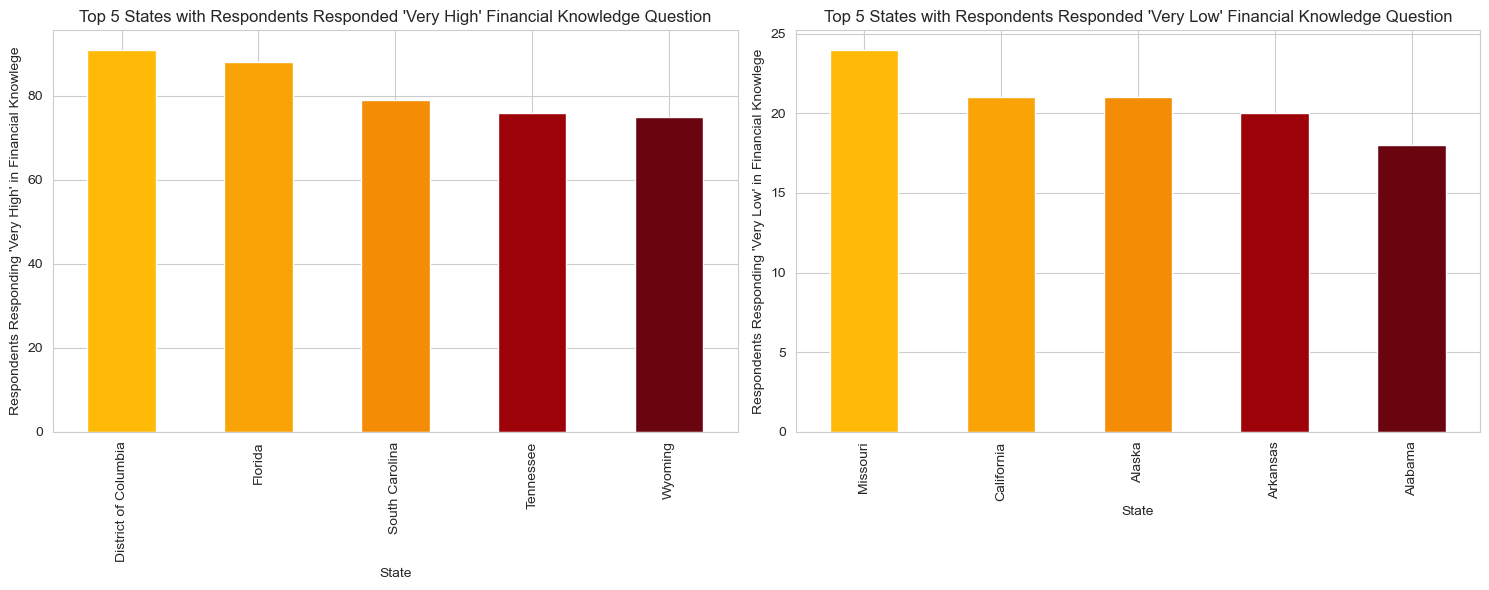

Respondents over the age of 65 are the highest age group in the survey population. Moreover, the female respondent population is higher than male respondents. However the difference is statistically small, 52.1% and 47.9%, respectively.

---

In [ ]:
plt.rcParams["figure.dpi"] = 140
fig, ax = plt.subplots(figsize=(12.5, 6.4))

sns.heatmap(
    mat, annot=True, fmt=".2f",
    cmap="YlGnBu",
    vmin=4.5, vmax=6.5,                        
    linewidths=0.5, linecolor="white",
    cbar_kws={"label": "Avg Financial Confidence (1–7, weighted)"},
    ax=ax
)

ax.set_title("Financial Confidence by Division × (Age × Gender) — NFCS 2024")
ax.set_xlabel("Age × Gender")
ax.set_ylabel("Census Division")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Optional: draw horizontal separators between region blocks for readability
split_after = [
    len(division_order_by_region["Northeast"]),
    len(division_order_by_region["Northeast"]) + len(division_order_by_region["Midwest"]),
    len(division_order_by_region["Northeast"]) + len(division_order_by_region["Midwest"]) + len(division_order_by_region["South"]),
]
for y in split_after:
    ax.hlines(y, *ax.get_xlim(), colors="white", linewidth=2)

plt.tight_layout()
plt.savefig("finconf_heatmap_division_age_gender_2024.png", dpi=300)
plt.show()



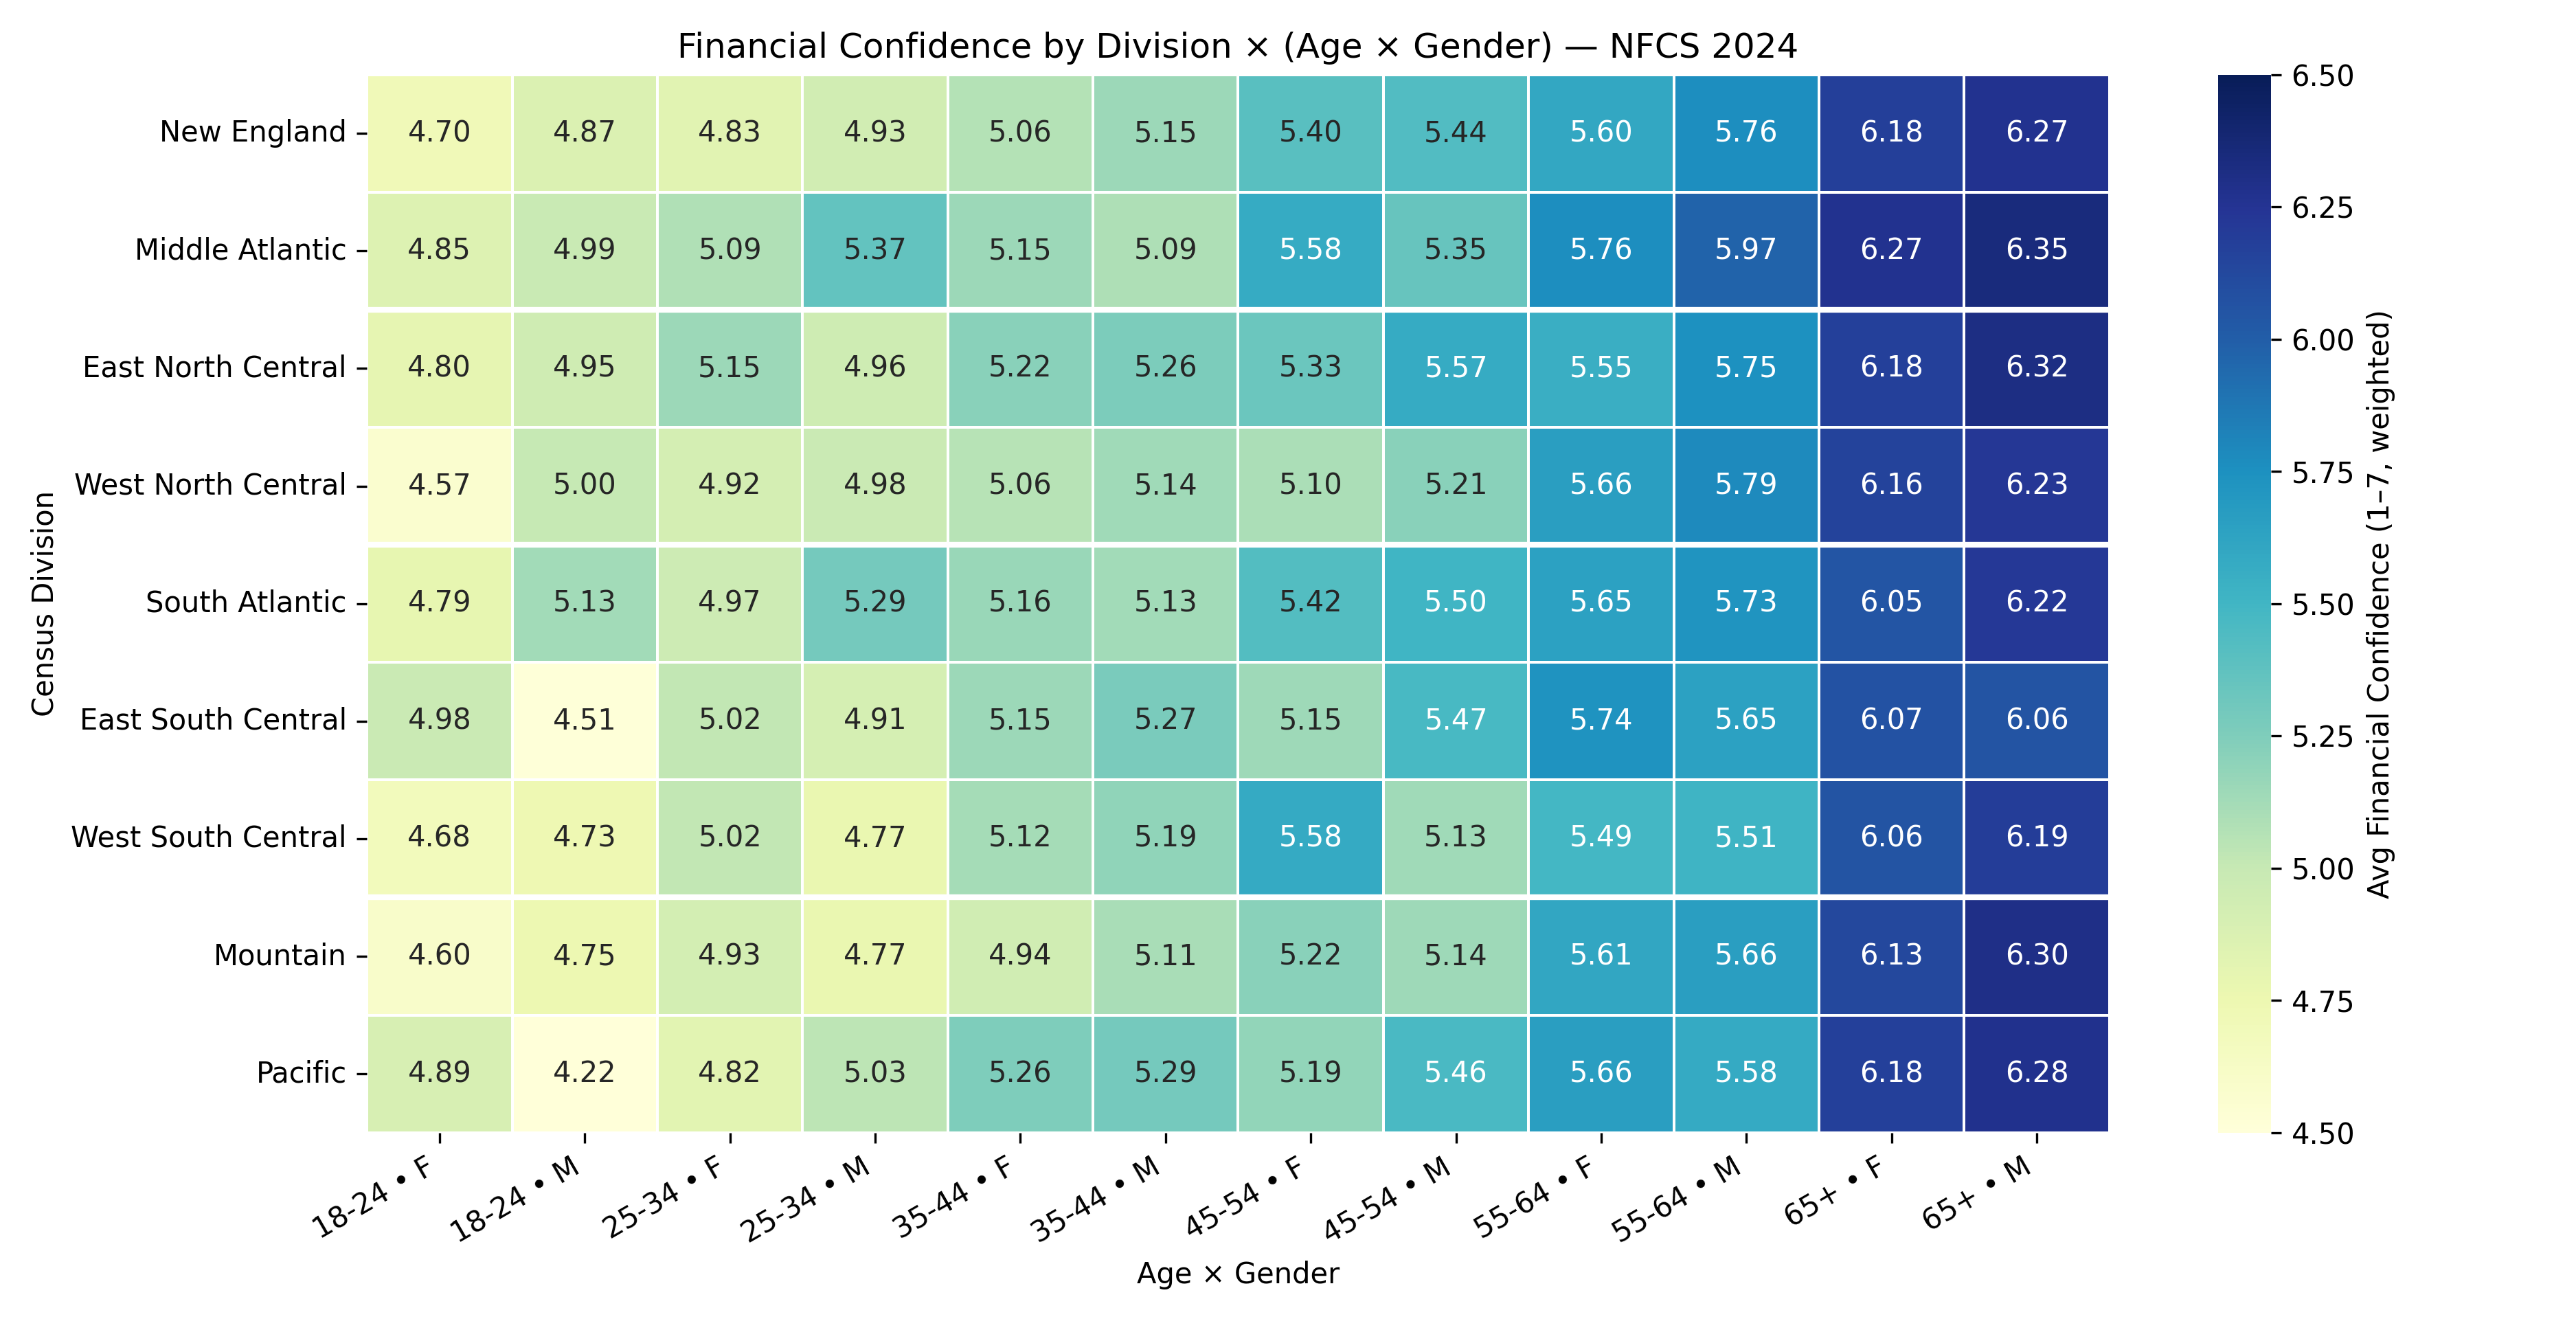

The heatmap highlights how financial confidence varies simultaneously by division, age, and gender in the 2024 NFCS. Across nearly all divisions, confidence is lowest among young adults (18–24) and rises steadily with age, peaking among those 65 and older. Men generally report slightly higher confidence than women in the same age group, but the gender gap is modest compared to the much larger age effect. At the geographic level, divisions such as the Middle Atlantic, East North Central, and Pacific show relatively higher confidence across most age–gender groups, while West South Central and Mountain tend to lag slightly behind. This pattern suggests that while regional context plays a role, the progression of financial confidence across the life cycle is the most dominant factor, with gender differences remaining consistent but secondary.

---

In [ ]:
plt.rcParams["figure.dpi"] = 140
age_order = ["18-24","25-34","35-44","45-54","55-64","65+"]

# If labels match standard, enforce order
if set(age_order).issuperset(set(work[age_col].dropna().unique())):
    age_gender_tbl[age_col] = pd.Categorical(age_gender_tbl[age_col], categories=age_order, ordered=True)

plt.figure(figsize=(9,6))
for g in age_gender_tbl[gender_col].dropna().unique():
    sub = age_gender_tbl[age_gender_tbl[gender_col] == g].sort_values(age_col)
    plt.plot(sub[age_col].astype(str), sub["mean_w"], marker="o", label=str(g))
    plt.errorbar(sub[age_col].astype(str), sub["mean_w"], yerr=sub["se_w"], fmt='none', capsize=4)

plt.xlabel("Age Group")
plt.ylabel("Average Financial Confidence (4.75-6.5, weighted)")
plt.title("Financial Confidence by Age and Gender (NFCS 2024)")
plt.ylim(4.75, 6.5)  # lock to the scale range
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("finconf_by_age_gender_2024.png")
plt.show()

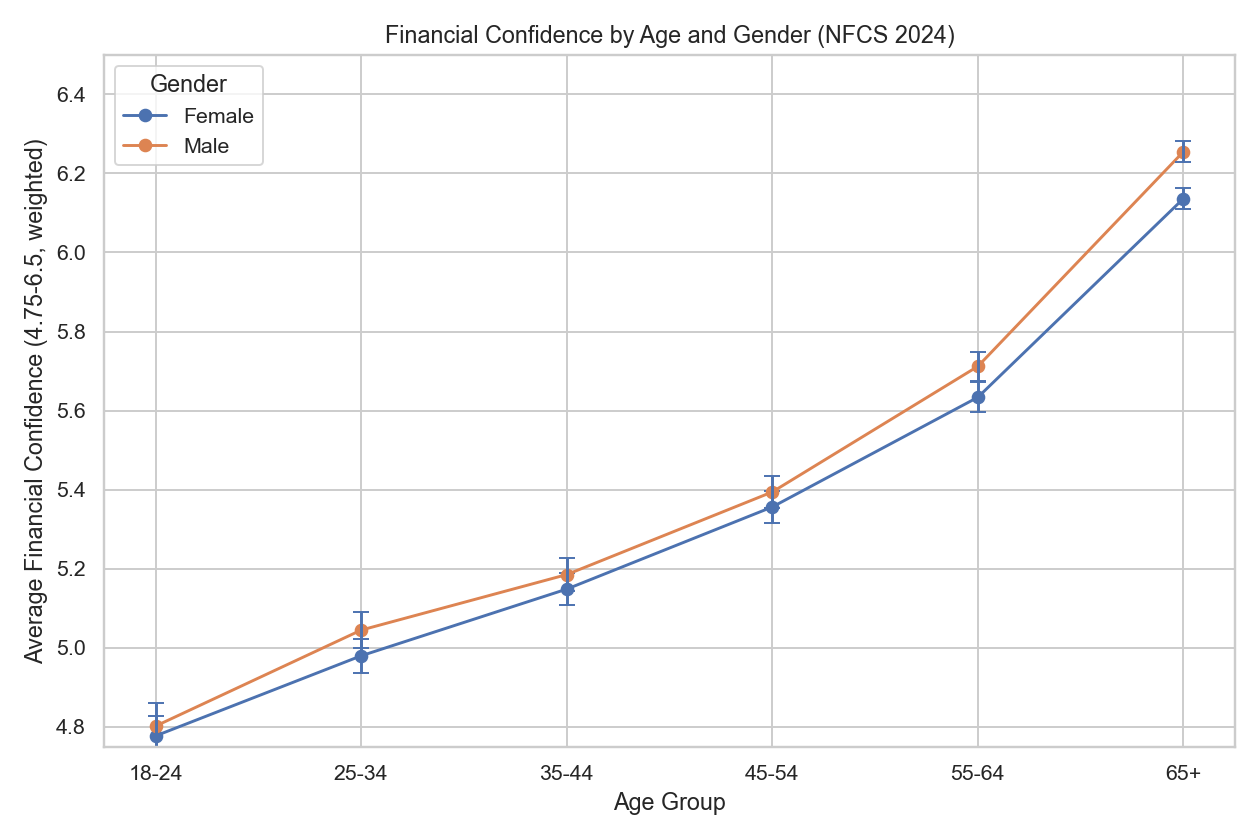

Financial confidence increases steadily with age in the 2024 NFCS data. Young adults (18–24) report the lowest average confidence, while older adults (65+) display the highest levels, suggesting that confidence grows with financial experience and accumulated decision-making. Across all age groups, men consistently report slightly higher confidence than women, though the gender gap remains modest. These results indicate that both age and gender are significant factors in shaping financial confidence, with generational experience playing a stronger role than gender differences.

---

In [ ]:
cat1 = 'Financial Knowledge'
cat2 = 'Gender&Age'

# Create a crosstab
ct = pd.crosstab(original_df[cat1], original_df[cat2])

# Plot heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    ct, 
    annot=True, 
    fmt='d', 
    cmap='cividis', 
    vmin=0,    # minimum value for color scale
    vmax=1000  # maximum value for color scale
)

ax.set_ylabel("Financial Knowledge (1 = Low, 7 = High)")

y_labels = [str(tick) for tick in ct.index]
ax.set_yticklabels(y_labels, rotation=0)

plt.title(f'Heatmap of {cat1} vs {cat2}')
plt.show()

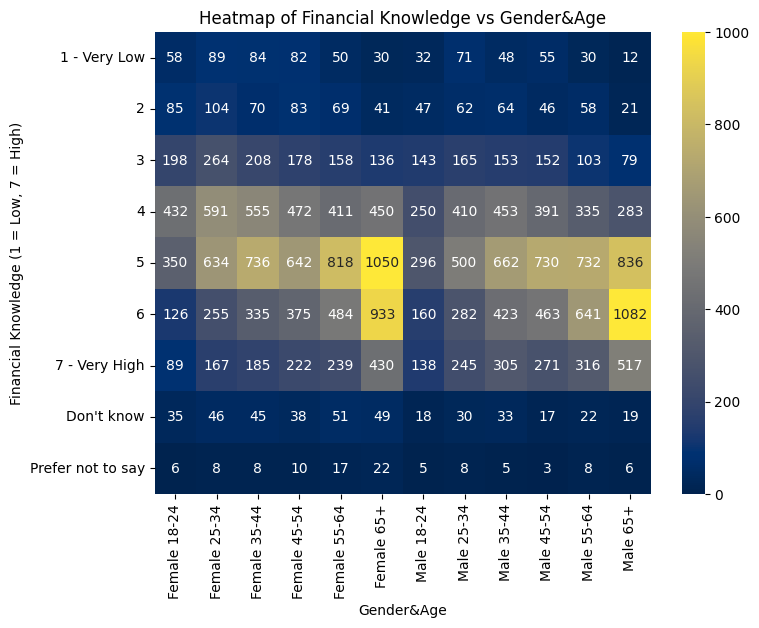

Initial finance knowledge assessments show that overall, older respondents, especially 65+, report higher financial knowledge scores compared to younger groups. Gender does not play a significant factor in terms of one’s financial knowledge. Further investigation will be conducted on the actual financial literacy score to determine whether or not the results align with the self-assessments.

---

In [ ]:
cross_tab_counts = pd.crosstab(df_2024['Annual Income'], df_2024['Financial Knowledge'])

cross_tab_counts_reorder = cross_tab_counts.reindex(index=row_values_reorder)

sns.heatmap(cross_tab_counts_reorder, annot=True, fmt='d', cmap=sunset_palette)
plt.title('Does the Level of Income Mean Having Higher Financial Knowledge?')
plt.xlabel('Financial Knowledge')
plt.ylabel('Annual Income')

plt.show()

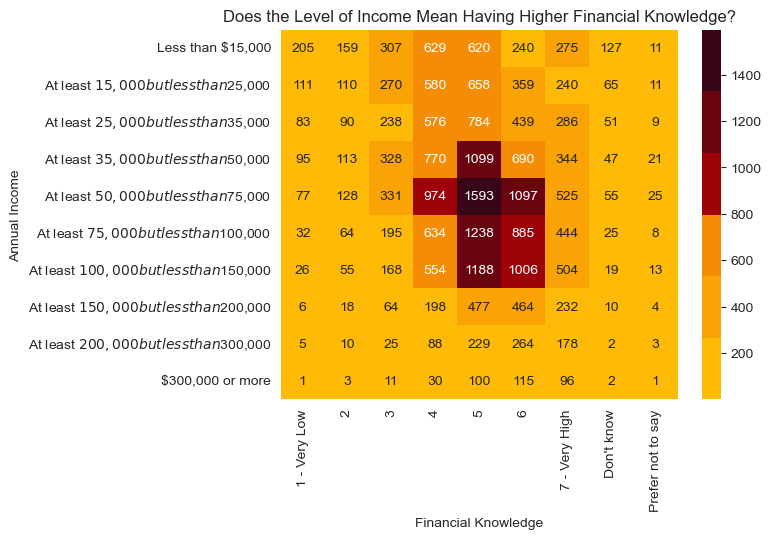

As income rises, self-reported financial knowledge also increases. Lower-income groups (<$25k) cluster around low to mid scores, while middle- and higher-income groups ($50k–$150k) report much higher confidence, concentrated at levels 5–7. Overall, the heatmap shows a clear positive link between income and financial knowledge

---

### Notebook Organization

### Exploratory Questions & Answers

The exploratory questions reflect the initial observations, analysis, and questions on reported financial confidence and financial knowledge. These self-assessments are subjective, and the exploratory questions focus on evaluating findings within age, gender, region, and income of the U.S. population. To reach a more objective result, this project defines financial literacy by developing a score system to assess one’s actual financial literacy. The columns used to calculate financial literacy include: college savings for children, credit record, checking and savings accounts, overdraft frequency, retirement plans, investments, mortgage payments, past due payments, late loans, and whether the individual has been contacted by a debt agency. These factors were then categorized into buckets with corresponding weights.

### Question 1: How does financial confidence change across age groups and genders
Answer:Young adults (18–24) report the lowest average confidence, while older adults (65+) display the highest levels, suggesting that confidence grows with financial experience and accumulated decision-making. Across all age groups, men consistently report slightly higher confidence than women, though the gender gap remains modest. These results indicate that both age and gender are significant factors in shaping financial confidence, with generational experience playing a stronger role than gender differences.


### Question 2: How does financial confidence change across regions and diversions vs.age groups and genders
Answer:Across nearly all divisions, confidence is lowest among young adults (18–24) and rises steadily with age, peaking among those 65 and older. Men generally report slightly higher confidence than women in the same age group, but the gender gap is modest compared to the much larger age effect. At the geographic level, divisions such as the Middle Atlantic, East North Central, and Pacific show relatively higher confidence across most age–gender groups, while West South Central and Mountain tend to lag slightly behind. This pattern suggests that while regional context plays a role, the progression of financial confidence across the life cycle is the most dominant factor, with gender differences remaining consistent but secondary.


### Question 3: Top 5 states with ‘very high’ or ‘very low’ financial knowledge
Analyzing numbers of respondents answering questions on their level of financial knowledge, District of Columbia, Florida, South Caroline, Tennessee, and Wyoming are the top 5 states with highest respondents answered ‘very high’ in terms of their financial knowledge. On the other hand, we see the opposite response in Missouri, California, Alaska, Arkansas and Alabama states, where the highest respondents answered ‘very low’ in their financial knowledge level.
This finding would be more interesting if we could compare side by side between the results of respondents and our analysis on their financial knowledge score using attributes from each respondent, such as [column names we used in creating a new financial knowledge score column]. This comparison would show how accurate their self-assessment is compared to their financial profiles.


### Question 4: Does having a higher income mean having higher financial knowledge?
	The heatmap shows the relationship between level of annual income and level of financial knowledge. Does having a higher income reflect a higher level of financial knowledge? According to the results in the heatmap, respondents within the annual income range between $35,000 and $150,000 reported to have higher financial knowledge level (between 5-7). Similarly, an income range equal to or lower than $35,000 shows lower level of financial knowledge (between 3-5). For an income range higher than $200,000, although it shows a higher level of financial knowledge, the sample size is too small to make any significant conclusion.


### Question 5: How does financial knowledge vary across gender&age?
When people are asked to self-assess their financial knowledge, it can be seen that both genders have a decent spread across mid-levels. The older the survey participants are, the more likely they are to identify as financially knowledgeable. When broken down by gender, men generally exhibit higher financial knowledge than women, with a greater concentration at the upper levels (5–7). In contrast, women tend to cluster around levels 3–5, with fewer reaching the highest levels (6–7) compared to men.


### Question 6:  How does financial literacy differ by education level?
People with higher levels of education tend to show better financial literacy scores. Respondents with a college degree report the highest literacy levels, while those with only a high school diploma or less often struggle more with topics like credit, debt, and retirement savings. This shows that education plays an important role in shaping financial knowledge and decision-making skills.


### Question 7: Financial literacy varying from different regions.
Financial literacy shows significant variation across different regions of the United States, influenced by factors such as local economic conditions, education systems, and access to financial resources.
States in the Northeast and West often report higher financial literacy scores due to greater access to education and financial services.
Southern and some Midwestern states tend to have lower financial literacy, which is linked to less robust financial education programs and economic disparity.
Urbanized regions generally score higher than rural areas, reflecting better job opportunities, banking access, and targeted financial literacy programs.
Regional disparities were identified by aggregating objective behavioral indicators like account holdings, payment timeliness, and investment participation, rather than relying on subjective confidence metrics.
Patterns discovered through this approach can be used to suggest targeted financial literacy campaigns or educational interventions, especially where the need is greatest. It highlights the value of region-specific strategies to close financial literacy gaps, ultimately supporting improved decision-making and life satisfaction nationwide.

### Conclusion

Overall, participants reported having a reasonable understanding of their financial knowledge, with confidence increasing consistently with age. Older adults (65+) showed the highest levels of confidence, while gender differences were present but relatively small compared to the stronger influence of life stage and accumulated financial experience. Regional variations exist, but age remains the dominant factor shaping financial confidence.  

Income also plays a significant role: middle- to higher-income groups ($35k–$150k) reported stronger financial knowledge, while lower-income groups (below $35k) demonstrated weaker knowledge. Demographically, older age groups were better prepared with emergency funds, whereas younger and middle-aged adults were less financially independent in times of financial emergency.  

It is important to note that both **financial confidence** and **financial knowledge** are self-reported measures. To accurately assess their validity, these self-assessments should be compared against objective financial literacy scores. Finally, education emerges as one of the most powerful tools for improving financial literacy, with targeted programs having the potential to reduce gaps in both knowledge and confidence across demographic groups.  


### GenAI Disclosure

AI tools were used selectively to support coding, debugging, and writing tasks. Specifically:

- **Code Assistance**: ChatGPT and GitHub Copilot were used to generate and refine Python code, including functions for data cleaning, plotting (e.g., heatmap labeling), and creating visualizations such as bar charts. These suggestions were reviewed, debugged, and tested by running the notebook end-to-end. Syntax and logic were modified as needed to ensure accuracy and consistency.  

- **Debugging & Troubleshooting**: AI assisted in resolving issues such as `ModuleNotFound` errors, syntax corrections, and dataframe filtering operations.  

- **Writing Support**: ChatGPT was used to improve grammar, clarity, and flow in written sections of the report, while ensuring that conclusions and interpretations were based entirely on team analysis.  

- **Learning & Exploration**: Team members used AI to brainstorm exploratory questions, practice customizing charts, and better understand the underlying Python and visualization libraries. AI suggestions served as a starting point, but all code execution, verification, and interpretation were performed independently by the team.  

- **Other Tools**: Perplexity Pro was occasionally used for syntax corrections and chart creation support.  

Overall, AI tools accelerated coding and writing tasks but did not replace critical thinking, analysis, or interpretation, which were carried out by the team.  


### References

- [DataCamp](https://app.datacamp.com/learn)  
- [Stack Overflow](https://stackoverflow.com/questions)  
- [W3Schools Python](https://www.w3schools.com/python/default.asp)  
- [Medium – Ultimate Markdown Guide for Jupyter Notebook](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)  
- [Great Learning – Open Source Python Libraries](https://www.mygreatlearning.com/blog/open-source-python-libraries/)  
- [US Financial Capability](https://www.usfinancialcapability.org/)  
- [Visual Capitalist – Mapped Financial Literacy Levels in All 50 U.S. States](https://www.visualcapitalist.com/mapped-financial-literacy-levels-in-all-50-u-s-states/)  
